<a href="https://colab.research.google.com/github/abmmatthew/dashboards/blob/master/LAB2_RealEstatePrices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
import numpy as np
import matplotlib.pyplot as plt #for creating plots

import os
import warnings
import urllib.request
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# make sure we prepare a path to save the data
# mkdir is a unix command: make a directory under current path, add ! before it to run in jupyter notebook
if not os.path.exists('Data'):
    !mkdir Data
if not os.path.exists('Data/RollingSale'):
    !mkdir Data/RollingSale

In [ ]:
try: #example of exception handling, so that Python does not crash and handles runtime errors
    print(1/0)
except:
    print('Error detected')

Error detected


In [ ]:
import urllib.request
import os

# Create the directory if it doesn't exist
os.makedirs('Data/RollingSale', exist_ok=True)

# Loop through the years and boroughs
for year in range(2011, 2020):  # For years 2011-2019
    for boro in ['manhattan', 'bronx', 'brooklyn', 'queens', 'statenisland']:  # For all boroughs
        try:
            # Try to retrieve the .xls file
            url = f'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/{year}/{year}_{boro}.xls'
            urllib.request.urlretrieve(url, f'Data/RollingSale/{year}_{boro}.xls')
        except urllib.error.HTTPError:
            # If .xls doesn't exist, try .xlsx
            url = f'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/{year}/{year}_{boro}.xlsx'
            urllib.request.urlretrieve(url, f'Data/RollingSale/{year}_{boro}.xlsx')

print('done')

done


In [ ]:
#As we may recall from the previous lab, we need to skip first 4 rows before the data can be uploaded properly.

Sales = pd.read_excel('./Data/RollingSale/2012_manhattan.xls') # filename corrected to match the downloaded filename
Sales

,"MANHATTAN ANNUALIZE SALE FOR YEAR 2012. All Sales From Jan 1, 2012 - Dec 31, 2012.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 03/31/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neighborhood Name and Descriptive Data is as o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
4,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,10,,C0,356 EAST 8TH STREET,,...,3,0,3,1804,2928,1899,1,C0,0,2012-07-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26257,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,27,,G7,655 WEST 187 STREET,,...,0,0,0,1582,0,0,4,G7,0,2012-09-24 00:00:00
26258,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,28,,G7,657 WEST 187 STREET,,...,0,0,0,1582,0,0,4,G7,4750000,2012-09-24 00:00:00
26259,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,32,,G7,667 WEST 187 STREET,,...,0,0,0,4496,0,0,4,G7,0,2012-09-24 00:00:00
26260,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2246,43,,G1,270 DYCKMAN STREET,,...,0,2,2,14980,46200,1929,4,G1,4917000,2012-09-11 00:00:00


In [ ]:
'''skip first four rows'''
Sales = pd.read_excel('/content/Data/RollingSale/2012_manhattan.xls',skiprows = 4)
Sales

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,10,,C0,356 EAST 8TH STREET,,...,3,0,3,1804,2928,1899,1,C0,0,2012-07-09
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,,C4,715 EAST 5TH STREET,,...,20,0,20,2426,9345,1900,2,C4,3650000,2012-09-06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,,C4,274 EAST SEVENTH STREET,,...,13,0,13,2726,13002,1910,2,C4,895250,2012-10-25
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,,C2,271 EAST 7TH STREET,,...,5,0,5,2169,3728,1900,2,C2,0,2012-02-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,387,157,,C1,619 EAST 5TH STREET,,...,40,0,40,4853,25200,1900,2,C1,10800000,2012-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26253,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,27,,G7,655 WEST 187 STREET,,...,0,0,0,1582,0,0,4,G7,0,2012-09-24
26254,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,28,,G7,657 WEST 187 STREET,,...,0,0,0,1582,0,0,4,G7,4750000,2012-09-24
26255,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2170,32,,G7,667 WEST 187 STREET,,...,0,0,0,4496,0,0,4,G7,0,2012-09-24
26256,1,WASHINGTON HEIGHTS UPPER,29 COMMERCIAL GARAGES,4,2246,43,,G1,270 DYCKMAN STREET,,...,0,2,2,14980,46200,1929,4,G1,4917000,2012-09-11


In [ ]:
#check column names
print(Sales.columns)

Index(['BOROUGH\n', 'NEIGHBORHOOD\n', 'BUILDING CLASS CATEGORY\n',
       'TAX CLASS AT PRESENT\n', 'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AT PRESENT\n', 'ADDRESS\n', 'APARTMENT NUMBER\n',
       'ZIP CODE\n', 'RESIDENTIAL UNITS\n', 'COMMERCIAL UNITS\n',
       'TOTAL UNITS\n', 'LAND SQUARE FEET\n', 'GROSS SQUARE FEET\n',
       'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')


In [ ]:
#returning to the point fix column names, excluding \n
Sales.columns = [col.replace('\n','') for col in Sales.columns] #use list comprehension to replace a list of column names with the one having line breaks removed
Sales.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,10,,C0,356 EAST 8TH STREET,,...,3,0,3,1804,2928,1899,1,C0,0,2012-07-09
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,,C4,715 EAST 5TH STREET,,...,20,0,20,2426,9345,1900,2,C4,3650000,2012-09-06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,,C4,274 EAST SEVENTH STREET,,...,13,0,13,2726,13002,1910,2,C4,895250,2012-10-25
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,,C2,271 EAST 7TH STREET,,...,5,0,5,2169,3728,1900,2,C2,0,2012-02-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,387,157,,C1,619 EAST 5TH STREET,,...,40,0,40,4853,25200,1900,2,C1,10800000,2012-07-13


In [ ]:
Sales.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
#subset dataframe by selecting columns we're going to use
selectedNames = ['BOROUGH','BLOCK','LOT', 'BUILDING CLASS CATEGORY', 'ADDRESS', 'ZIP CODE',
                'GROSS SQUARE FEET', 'YEAR BUILT','SALE PRICE', 'SALE DATE']
Sales = Sales[selectedNames]
Sales.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,1,377,10,03 THREE FAMILY HOMES,356 EAST 8TH STREET,10009,2928,1899,0,2012-07-09
1,1,375,62,07 RENTALS - WALKUP APARTMENTS,715 EAST 5TH STREET,10009,9345,1900,3650000,2012-09-06
2,1,376,30,07 RENTALS - WALKUP APARTMENTS,274 EAST SEVENTH STREET,10009,13002,1910,895250,2012-10-25
3,1,377,52,07 RENTALS - WALKUP APARTMENTS,271 EAST 7TH STREET,10009,3728,1900,0,2012-02-16
4,1,387,157,07 RENTALS - WALKUP APARTMENTS,619 EAST 5TH STREET,10009,25200,1900,10800000,2012-07-13


In [ ]:
# get all the files from a given folder
files = os.listdir('./Data/RollingSale/')
files

['2014_brooklyn.xls',
 '2015_bronx.xls',
 '2016_bronx.xls',
 '2015_manhattan.xls',
 '2013_brooklyn.xls',
 '2019_manhattan.xlsx',
 '2017_queens.xls',
 '2014_statenisland.xls',
 '2016_manhattan.xls',
 '2012_statenisland.xls',
 '2017_bronx.xls',
 '2016_statenisland.xls',
 '2014_manhattan.xls',
 '2014_bronx.xls',
 '2011_queens.xls',
 '2013_bronx.xls',
 '2015_queens.xls',
 '2019_queens.xlsx',
 '2013_manhattan.xls',
 '2011_brooklyn.xls',
 '2018_manhattan.xlsx',
 '2017_brooklyn.xls',
 '2018_brooklyn.xlsx',
 '2013_queens.xls',
 '2012_manhattan.xls',
 '2019_bronx.xlsx',
 '2016_brooklyn.xls',
 '2012_brooklyn.xls',
 '2015_brooklyn.xls',
 '2019_statenisland.xlsx',
 '2018_queens.xlsx',
 '2018_statenisland.xlsx',
 '2012_bronx.xls',
 '2011_manhattan.xls',
 '2011_bronx.xls',
 '2011_statenisland.xls',
 '2015_statenisland.xls',
 '2012_queens.xls',
 '2019_brooklyn.xlsx',
 '2017_manhattan.xls',
 '2014_queens.xls',
 '2016_queens.xls',
 '2017_statenisland.xls',
 '2018_bronx.xlsx',
 '2013_statenisland.xls']

In [ ]:
#now read all those files, apply the cleaning above, and merge into a single dataframe (assume they have the same format which is apparently the case)
#takes up to a minute to run
Sales = pd.read_excel('./Data/RollingSale/' + files[0],skiprows = 4) #read the first one to set up the dataframe
Sales.columns = [name.replace('\n','') for name in Sales.columns] #fix the columns
Sales = Sales[selectedNames] #filter the columns

for file in files[1:]: #for all the files in the folder
    if '.xls' in  file: #take only Excel ones (both xls and xlsx will qualify)
        df = pd.read_excel('./Data/RollingSale/' + file, skiprows = 4) #read the file
        df.columns = [name.replace('\n','') for name in df.columns] #fix the column names
        df = df[selectedNames] #filter the column names
        # pd.concat: Concatenate pandas objects along rows or columns
        Sales = pd.concat([Sales, df], axis = 0) #add the new file to the dataframe

In [ ]:
Sales.head() #preview the data

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,3,6360,14,01 ONE FAMILY DWELLINGS,8663 15TH AVENUE,11228.0,2224.0,1930.0,450000,2014-09-08
1,3,6363,22,01 ONE FAMILY DWELLINGS,8645 16TH AVENUE,11214.0,1492.0,1930.0,0,2014-06-23
2,3,6363,119,01 ONE FAMILY DWELLINGS,8651 16 AVENUE,11214.0,1492.0,1930.0,670000,2014-04-16
3,3,6373,55,01 ONE FAMILY DWELLINGS,1950 86TH STREET,11214.0,2870.0,1931.0,0,2014-07-28
4,3,6374,67,01 ONE FAMILY DWELLINGS,8642 20TH AVENUE,11214.0,3240.0,1925.0,828000,2014-03-19


In [ ]:
len(Sales) #total number of records

773881

In [ ]:
Sales.describe() #stats on all the numeric columns

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,773881.000000,773881.000000,773881.000000,773865.000000,7.566550e+05,767854.000000,7.738810e+05,773881
mean,2.883927,4036.389453,384.327311,10777.839641,4.355976e+03,1769.972981,1.067202e+06,2015-07-24 05:24:12.479127296
min,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2011-01-01 00:00:00
25%,1.000000,1196.000000,22.000000,10128.000000,0.000000e+00,1920.000000,0.000000e+00,2013-06-10 00:00:00
50%,3.000000,2895.000000,50.000000,11207.000000,1.170000e+03,1936.000000,3.370000e+05,2015-07-29 00:00:00
75%,4.000000,5986.000000,1002.000000,11355.000000,2.279000e+03,1965.000000,7.300000e+05,2017-09-17 00:00:00
max,5.000000,16350.000000,9139.000000,11697.000000,8.942176e+06,2020.000000,4.111112e+09,2019-12-31 00:00:00
std,1.320072,3538.164489,662.368159,884.277142,3.245737e+04,564.868687,1.302796e+07,NaN


In [ ]:
(Sales['ZIP CODE'] == 0).sum() #total number of rows where zip code is zero (all such rows count as one during comparison, then summ

2988

In [ ]:
Sales['ZIP CODE'] == 0 #just a breakdown of how it works

,ZIP CODE
0,False
1,False
2,False
3,False
4,False
...,...
7065,False
7066,False
7067,False
7068,False


In [ ]:
(Sales['YEAR BUILT'] == 0).sum() #nearly 10% of the records have missing year

70762

In [ ]:
(Sales['GROSS SQUARE FEET'] == 0).sum() #and almost half of the records have missing size!!!

328875

In [ ]:
(Sales['SALE PRICE'] == 0).sum() #missing price is also quite common

240263

In [ ]:
#so if we were to quantify the average price per square foot accross the entire dataset it might be fully unreliable
Sales['SALE PRICE'].sum()/Sales['GROSS SQUARE FEET'].sum()

250.57481379656724

In [ ]:
#so lets filter the zero values first
Sales = Sales[(Sales['ZIP CODE'] > 0) & (Sales['GROSS SQUARE FEET'] > 0) & (Sales['YEAR BUILT'] > 0) & (Sales['SALE PRICE'] > 0)]

In [ ]:
len(Sales) #unfortunately it wipes out nearly 2/3 of the data records

266256

In [ ]:
#now if we repeate the price per square foot assessment for this sample we're getting a 10% lower number
Sales['SALE PRICE'].sum()/Sales['GROSS SQUARE FEET'].sum()

231.78240113866826

In [ ]:
Sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,266256.000000,266256.000000,266256.000000,266256.000000,2.662560e+05,266256.000000,2.662560e+05,266256
mean,3.390083,5231.575281,106.658445,10971.413238,7.727450e+03,1943.061520,1.791087e+06,2015-10-09 14:58:34.332071168
min,1.000000,1.000000,1.000000,10001.000000,1.000000e+00,1050.000000,1.000000e+00,2011-01-01 00:00:00
25%,3.000000,1968.000000,20.000000,10459.000000,1.413750e+03,1920.000000,3.700000e+05,2013-08-30 00:00:00
50%,4.000000,4631.000000,39.000000,11219.000000,2.000000e+03,1931.000000,5.700000e+05,2015-11-16 00:00:00
75%,4.000000,7458.000000,66.000000,11369.000000,3.000000e+03,1960.000000,9.000000e+05,2018-01-11 00:00:00
max,5.000000,16323.000000,9040.000000,11697.000000,8.942176e+06,2019.000000,4.111112e+09,2019-12-31 00:00:00
std,1.107263,3792.350171,293.794325,500.859505,4.488525e+04,33.098829,1.939670e+07,NaN


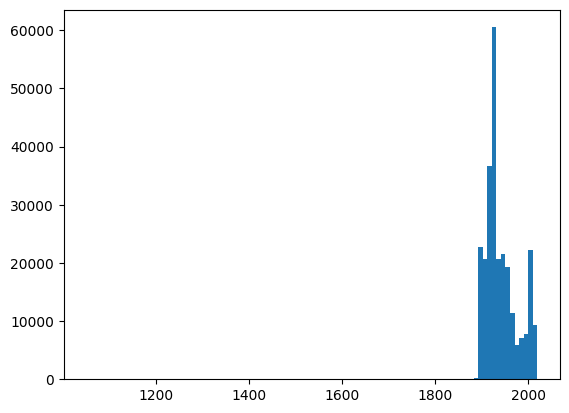

In [ ]:
# for the year built
n_bins = 100
plt.hist(Sales['YEAR BUILT'], bins=n_bins);

In [ ]:
(Sales['YEAR BUILT']<1850).sum() #this way we only lose 123 records

123

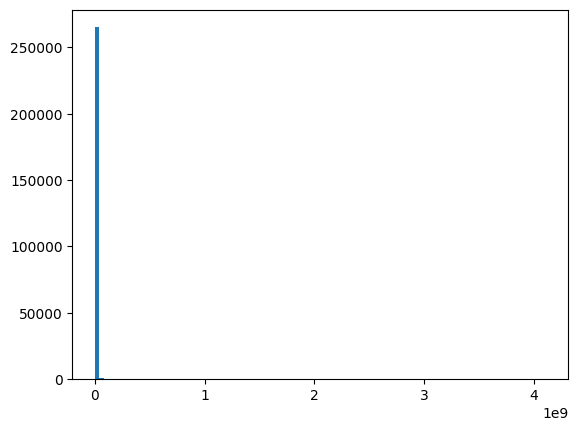

In [ ]:
# for the price, if we try to plot the histogram directly, it doed not make much sense
#as nearly everything falls in the lowest bin
plt.hist(Sales['SALE PRICE'], bins=100);

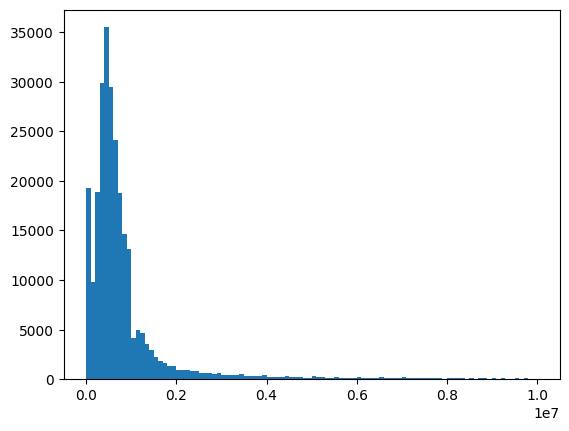

In [ ]:
#take only properties worth up to 10mln; we can see majority is under 1M and vast majority falls under 2M.
plt.hist(Sales['SALE PRICE'][Sales['SALE PRICE']<1e7], bins=100);

In [ ]:
def plot_loghist(x, bins): #introduce a function for plotting a log-scale histogram
  #it ensures log-scale binning and label on the original scale
    logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),bins)
    plt.hist(x, bins=logbins)
    plt.xscale('log')

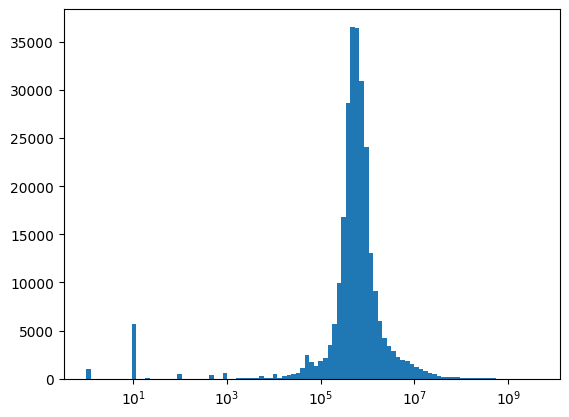

In [ ]:
plot_loghist(Sales['SALE PRICE'], 100) #log-histogram of prices

In [ ]:
(Sales['SALE PRICE']<1e4).sum() #losing 9000 low outliers

8993

In [ ]:
(Sales['SALE PRICE']>=5e8).sum() #losing less than 500 high outliers

47

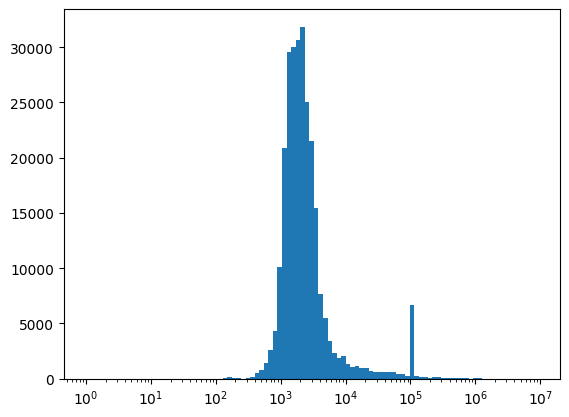

In [ ]:
plot_loghist(Sales['GROSS SQUARE FEET'], 100)

In [ ]:
(Sales['GROSS SQUARE FEET']>=1e5).sum() #the cutoff at 1e5 seems to cover this artifact, cutting nearly 8000 records

7869

In [ ]:
(Sales['GROSS SQUARE FEET']<300).sum() #300ft cutoff shaves 260 low outliers

260

In [ ]:
#so lets filter the zero values first
Sales = Sales[(Sales['YEAR BUILT'] >= 1850) & (Sales['GROSS SQUARE FEET'] >=300) & (Sales['GROSS SQUARE FEET'] <1e5)
              & (Sales['SALE PRICE'] >= 1e4) & (Sales['SALE PRICE'] <= 5e8)]

In [ ]:
len(Sales) #the sample shrank to quarter million records - more than 3 times from the initial size

249394

In [ ]:
Sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,249394.000000,249394.000000,249394.000000,249394.000000,249394.000000,249394.000000,2.493940e+05,249394
mean,3.460596,5357.611414,108.569144,10997.474859,3370.719556,1941.528834,1.331203e+06,2015-11-01 15:40:14.598586880
min,1.000000,1.000000,1.000000,10001.000000,300.000000,1850.000000,1.000000e+04,2011-01-01 00:00:00
25%,3.000000,2240.000000,20.000000,10463.000000,1400.000000,1920.000000,4.000000e+05,2013-10-04 12:00:00
50%,4.000000,4737.000000,40.000000,11221.000000,1968.000000,1930.000000,5.989250e+05,2015-12-16 00:00:00
75%,4.000000,7623.000000,67.000000,11370.000000,2875.000000,1960.000000,9.250000e+05,2018-01-26 00:00:00
max,5.000000,16323.000000,9040.000000,11697.000000,99946.000000,2019.000000,3.900000e+08,2019-12-31 00:00:00
std,1.048425,3777.734846,295.850111,482.294804,6958.160557,31.731808,4.828788e+06,NaN


In [ ]:
print(Sales['BUILDING CLASS CATEGORY'].value_counts().to_string()) #get all the categories including number of their appearances

BUILDING CLASS CATEGORY
01  ONE FAMILY DWELLINGS                        45666
02  TWO FAMILY DWELLINGS                        37775
01 ONE FAMILY DWELLINGS                         25114
02 TWO FAMILY DWELLINGS                         18906
01  ONE FAMILY HOMES                            16877
02  TWO FAMILY HOMES                            14666
01 ONE FAMILY DWELLINGS                         13392
07  RENTALS - WALKUP APARTMENTS                 12703
02 TWO FAMILY DWELLINGS                         10153
03  THREE FAMILY DWELLINGS                       9877
13 CONDOS - ELEVATOR APARTMENTS                  7086
03 THREE FAMILY DWELLINGS                        4560
03  THREE FAMILY HOMES                           3789
22  STORE BUILDINGS                              3274
07 RENTALS - WALKUP APARTMENTS                   3069
14  RENTALS - 4-10 UNIT                          2424
03 THREE FAMILY DWELLINGS                        2391
07 RENTALS - WALKUP APARTMENTS                   1641
08  

In [ ]:
def sqr(x): #traditional syntax for function definition
    return x ** 2

In [ ]:
sqr = lambda x: x ** 2 #example of creating an inline function

In [ ]:
sqr(10)

100

In [ ]:
# split building class category to two parts: leading 2 digits code (unique category ID) and its textual description than may vary
Sales['CATEGORY ID'] = Sales['BUILDING CLASS CATEGORY'].apply(lambda x: x[:2]) #apply a custom inline function taking first two digits of the category
Sales['BUILDING CLASS NAME'] = Sales['BUILDING CLASS CATEGORY'].apply(lambda x: x.split(' ',1)[1]).apply(lambda x:x.strip())
# also remove leading and trailing spaces



In [ ]:
Sales.loc[Sales['CATEGORY ID'] == '01'].groupby(['BOROUGH','CATEGORY ID']).count() #how many single family houses do we have per borough

,,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BUILDING CLASS NAME
BOROUGH,CATEGORY ID,,,,,,,,,,
1,01,863,863,863,863,863,863,863,863,863,863
2,01,7584,7584,7584,7584,7584,7584,7584,7584,7584,7584
3,01,17983,17983,17983,17983,17983,17983,17983,17983,17983,17983
4,01,48402,48402,48402,48402,48402,48402,48402,48402,48402,48402
5,01,26217,26217,26217,26217,26217,26217,26217,26217,26217,26217


In [ ]:
#use groupby to get a list of unique category names corresponding to each code (building classes) and use a count of any field (e.g. ADDRESS) to see how often those are occuring
Sales[['CATEGORY ID','BUILDING CLASS NAME','ADDRESS']].groupby(['CATEGORY ID','BUILDING CLASS NAME']).count()

ADDRESS
CATEGORY ID BUILDING CLASS NAME                             
01          ONE FAMILY DWELLINGS                       84172
            ONE FAMILY HOMES                           16877
02          TWO FAMILY DWELLINGS                       66834
            TWO FAMILY HOMES                           14666
03          THREE FAMILY DWELLINGS                     16828
            THREE FAMILY HOMES                          3789
04          TAX CLASS 1 CONDOS                           953
05          TAX CLASS 1 VACANT LAND                      341
06          TAX CLASS 1 - OTHER                           56
07          RENTALS - WALKUP APARTMENTS                17413
08          RENTALS - ELEVATOR APARTMENTS               2131
09          COOPS - WALKUP APARTMENTS                     80
10          COOPS - ELEVATOR APARTMENTS                   90
11          CONDO-RENTALS                                 32
            SPECIAL CONDO BILLING LOTS                    12
12          CONDOS - WALKUP APARTMENTS                   468
13          CONDOS - ELEVATOR APARTMENTS                7090
14          RENTALS - 4-10 UNIT                         3376
15          CONDOS - 2-10 UNIT RESIDENTIAL               902
16          CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT        2
17          CONDO COOPS                                    4
            CONDOPS                                       10
18          TAX CLASS 3 - UNTILITY PROPERTIES              1
21          OFFICE BUILDINGS                            1837
22          STORE BUILDINGS                             4806
23          LOFT BUILDINGS                               302
25          LUXURY HOTELS                                 26
26          OTHER HOTELS                                 183
27          FACTORIES                                   1227
28          COMMERCIAL CONDOS                              4
29          COMMERCIAL GARAGES                          1627
30          WAREHOUSES                                  1603
31          COMMERCIAL VACANT LAND                        39
32          HOSPITAL AND HEALTH FACILITIES               248
33          EDUCATIONAL FACILITIES                       233
34          THEATRES                                      39
35          INDOOR PUBLIC AND CULTURAL FACILITIES        148
36          OUTDOOR RECREATIONAL FACILITIES               22
37          RELIGIOUS FACILITIES                         603
38          ASYLUMS AND HOMES                             79
39          TRANSPORTATION FACILITIES                      7
40          SELECTED GOVERNMENTAL FACILITIES               5
41          TAX CLASS 4 - OTHER                          152
42          CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC         2
43          CONDO OFFICE BUILDINGS                         1
44          CONDO PARKING                                 15
45          CONDO HOTELS                                  10
46          CONDO STORE BUILDINGS                         49

In [ ]:
Price_per_category = Sales[['CATEGORY ID','GROSS SQUARE FEET','SALE PRICE']].groupby(['CATEGORY ID']).sum()

In [ ]:
Price_per_category['PRICE_SQFT'] = Price_per_category['SALE PRICE'] / Price_per_category['GROSS SQUARE FEET']

In [ ]:
Price_per_category #let's see how broadly pricing ranges depending on the category

,GROSS SQUARE FEET,SALE PRICE,PRICE_SQFT
CATEGORY ID,,,
01,164413416.0,64867313313,394.537836
02,183829476.0,59530959618,323.837944
03,62256797.0,18327037380,294.378096
04,1217921.0,577353856,474.048691
05,1287725.0,228265969,177.262979
06,99336.0,26133963,263.086525
07,153094027.0,51160027092,334.173894
08,94133701.0,27977191912,297.206969
09,1700300.0,234957539,138.185931


In [ ]:
SingeSales = Sales.loc[Sales['CATEGORY ID'] == '01']

In [ ]:
len(SingeSales) #this leaves us with 100k records

101049

In [ ]:
SingeSales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,101049.000000,101049.000000,101049.000000,101049.000000,101049.000000,101049.000000,1.010490e+05,101049
mean,3.905759,6469.669457,72.529288,11001.911241,1627.066235,1943.936783,6.419392e+05,2015-11-19 08:12:06.776118528
min,1.000000,14.000000,1.000000,10001.000000,300.000000,1850.000000,1.000000e+04,2011-01-03 00:00:00
25%,3.000000,3689.000000,21.000000,10314.000000,1200.000000,1925.000000,3.600000e+05,2013-10-25 00:00:00
50%,4.000000,5965.000000,41.000000,11234.000000,1440.000000,1940.000000,4.875000e+05,2016-01-20 00:00:00
75%,5.000000,8847.000000,70.000000,11412.000000,1840.000000,1960.000000,6.800000e+05,2017-12-27 00:00:00
max,5.000000,16323.000000,4336.000000,11694.000000,72703.000000,2019.000000,7.710000e+07,2019-12-31 00:00:00
std,0.897559,3786.384803,149.610895,491.674879,842.525763,27.489348,1.104396e+06,NaN


In [ ]:
SingeSales['PRICE_SQFT'] = SingeSales['SALE PRICE'] / SingeSales['GROSS SQUARE FEET']

In [ ]:
SingeSales.describe() #while the average price per sq.ft look reasonable, the min and max values are way too extreme

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,PRICE_SQFT
count,101049.000000,101049.000000,101049.000000,101049.000000,101049.000000,101049.000000,1.010490e+05,101049,101049.000000
mean,3.905759,6469.669457,72.529288,11001.911241,1627.066235,1943.936783,6.419392e+05,2015-11-19 08:12:06.776118528,383.074886
min,1.000000,14.000000,1.000000,10001.000000,300.000000,1850.000000,1.000000e+04,2011-01-03 00:00:00,3.210273
25%,3.000000,3689.000000,21.000000,10314.000000,1200.000000,1925.000000,3.600000e+05,2013-10-25 00:00:00,241.875000
50%,4.000000,5965.000000,41.000000,11234.000000,1440.000000,1940.000000,4.875000e+05,2016-01-20 00:00:00,335.574388
75%,5.000000,8847.000000,70.000000,11412.000000,1840.000000,1960.000000,6.800000e+05,2017-12-27 00:00:00,459.595960
max,5.000000,16323.000000,4336.000000,11694.000000,72703.000000,2019.000000,7.710000e+07,2019-12-31 00:00:00,21696.861250
std,0.897559,3786.384803,149.610895,491.674879,842.525763,27.489348,1.104396e+06,NaN,287.424172


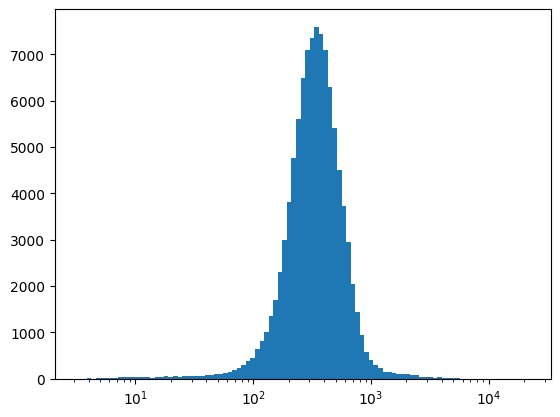

In [ ]:
plot_loghist(SingeSales['PRICE_SQFT'], 100)

In [ ]:
SingeSales['PRICE_SQFT'].quantile(0.01)

45.59276018099548

In [ ]:
SingeSales['PRICE_SQFT'].quantile(0.99)

1313.966528640446

In [ ]:
SingeSales = SingeSales[(SingeSales['PRICE_SQFT'] >= SingeSales['PRICE_SQFT'].quantile(0.01)) & (SingeSales['PRICE_SQFT'] <= SingeSales['PRICE_SQFT'].quantile(0.99))]

In [ ]:
len(SingeSales) #as indeded we filter out around 2000 records (2% out of 100.000)

99027

In [ ]:
SingeSales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,PRICE_SQFT
count,99027.000000,99027.000000,99027.000000,99027.000000,99027.000000,99027.000000,9.902700e+04,99027,99027.000000
mean,3.926848,6507.727751,72.680592,11005.798621,1606.681501,1944.289759,5.748815e+05,2015-11-20 02:11:24.685995008,368.076018
min,1.000000,14.000000,1.000000,10001.000000,300.000000,1850.000000,2.000000e+04,2011-01-03 00:00:00,45.625943
25%,3.000000,3744.000000,21.000000,10314.000000,1196.000000,1925.000000,3.600000e+05,2013-10-25 00:00:00,243.722304
50%,4.000000,5993.000000,41.000000,11234.000000,1440.000000,1940.000000,4.875000e+05,2016-01-21 00:00:00,335.574388
75%,5.000000,8866.000000,70.000000,11412.000000,1830.000000,1960.000000,6.760000e+05,2017-12-27 00:00:00,456.186907
max,5.000000,16323.000000,4336.000000,11694.000000,72703.000000,2019.000000,1.293333e+07,2019-12-31 00:00:00,1313.405797
std,0.873529,3768.859075,150.200066,488.790934,755.122871,27.350803,4.178017e+05,NaN,178.544887


In [ ]:
# download zipcode map
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
# alternative url
url = 'https://github.com/CUSP2020PUI/Data/raw/master/ZIPCODE.zip'
urllib.request.urlretrieve(url,'Data/ZIPCODE.zip')

('Data/ZIPCODE.zip', <http.client.HTTPMessage at 0x7e65e86ca020>)

In [ ]:
#it comes in the zip archive, so use zipfile module to extract it
import zipfile
with zipfile.ZipFile('Data/ZIPCODE.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/ZIPCODE')

In [ ]:
os.listdir('./Data/ZIPCODE') #check the filename for the shapefile

['ZIP_CODE_040114.dbf',
 'ZIP_CODE_040114.sbn',
 'ZIP_CODE_040114.shx',
 'ZIP_CODE_040114.shp',
 'ZIP_CODE_040114.sbx',
 'ZIP_CODE_040114.prj',
 'ZIP_CODE_040114.shp.xml']

In [ ]:
#load the resulting shapefile using geopandas
zipcode = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


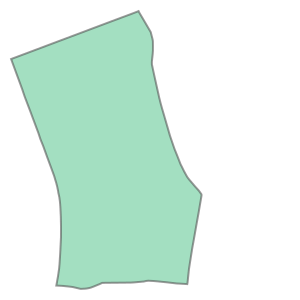

In [ ]:
#It also overloads some methods, e.g. accessing the geometry field value would now visualize it by default
zipcode.geometry[0]

In [ ]:
zipcode.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

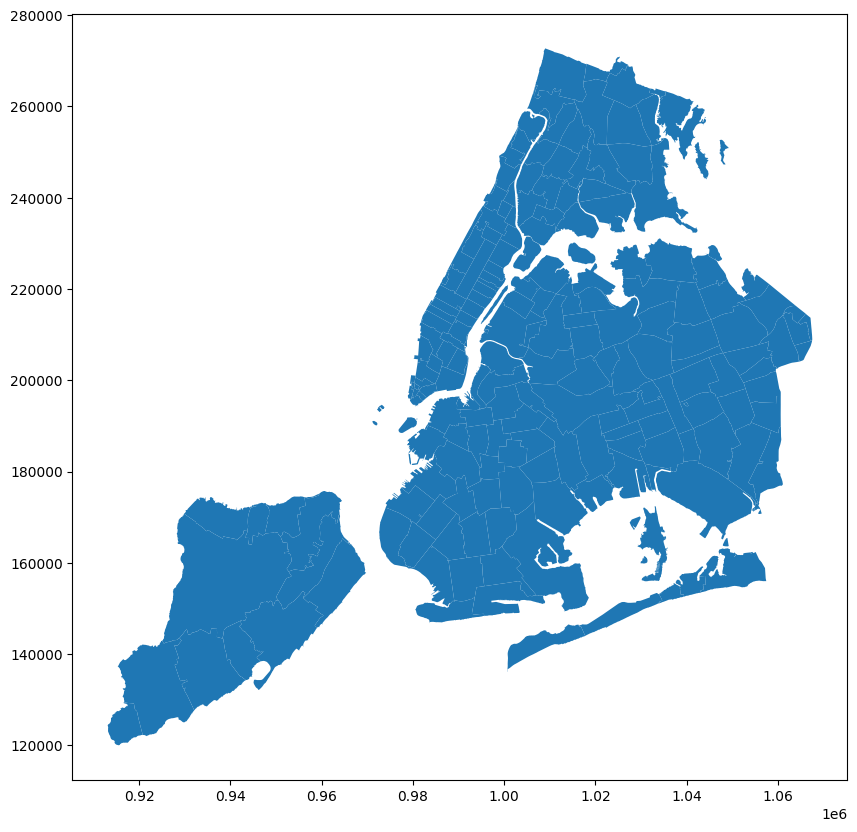

In [ ]:
#and if we want to plot the entire shapefile
zipcode.plot(figsize=(10,10),aspect='equal')
#map of zip code areas in NYC

In [ ]:
#and this is the list of all unique zip codes within the city
zipcode['ZIPCODE'].unique()

array(['11436', '11213', '11212', '11225', '11218', '11226', '11219',
       '11210', '11230', '11204', '10471', '10470', '10466', '10467',
       '10463', '10475', '10464', '10469', '10468', '10458', '10034',
       '10033', '10462', '10040', '10453', '10465', '10461', '10457',
       '10460', '10032', '10452', '10456', '10472', '10031', '10039',
       '10459', '10451', '10473', '10030', '10027', '10474', '10455',
       '10037', '10024', '10454', '10026', '10035', '10048', '10025',
       '11357', '10029', '00083', '11356', '11359', '11360', '11105',
       '10128', '10023', '11363', '10028', '11354', '11102', '11370',
       '10021', '11358', '11362', '10044', '11369', '11103', '11106',
       '11368', '11377', '11355', '11101', '11364', '10018', '10020',
       '11005', '10017', '10001', '10011', '10016', '11104', '11109',
       '10010', '11367', '10014', '10003', '11222', '10002', '11378',
       '10009', '10012', '10013', '10007', '11237', '11385', '10038',
       '11206', '100

In [ ]:
# we see the field is textual; so convert it to numeric (int)
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
NYC_zipcode = zipcode['ZIPCODE'].unique()# we see the field is textual; so convert it to numeric (int)
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
NYC_zipcode = zipcode['ZIPCODE'].unique()

In [ ]:
NYC_zipcode

array([11436, 11213, 11212, 11225, 11218, 11226, 11219, 11210, 11230,
       11204, 10471, 10470, 10466, 10467, 10463, 10475, 10464, 10469,
       10468, 10458, 10034, 10033, 10462, 10040, 10453, 10465, 10461,
       10457, 10460, 10032, 10452, 10456, 10472, 10031, 10039, 10459,
       10451, 10473, 10030, 10027, 10474, 10455, 10037, 10024, 10454,
       10026, 10035, 10048, 10025, 11357, 10029,    83, 11356, 11359,
       11360, 11105, 10128, 10023, 11363, 10028, 11354, 11102, 11370,
       10021, 11358, 11362, 10044, 11369, 11103, 11106, 11368, 11377,
       11355, 11101, 11364, 10018, 10020, 11005, 10017, 10001, 10011,
       10016, 11104, 11109, 10010, 11367, 10014, 10003, 11222, 10002,
       11378, 10009, 10012, 10013, 10007, 11237, 11385, 10038, 11206,
       10006, 11412, 10005, 11251, 10004, 11411, 11201, 11205, 11208,
       11207, 11413, 11217, 11238, 11231, 11422, 11420, 11417, 11215,
       11232, 11430, 11203, 11239, 11236, 11220, 10301, 10303, 11234,
       10302, 11693,

In [ ]:
SingeSales = SingeSales[SingeSales['ZIP CODE'].isin(NYC_zipcode)] #keep only the sales records that have a zip code with defined shape

In [ ]:
len(SingeSales) #we've only lost 9 more records

99018

In [ ]:
SingeSales.head()

,BOROUGH,BLOCK,LOT,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,CATEGORY ID,BUILDING CLASS NAME,PRICE_SQFT
0,3,6360,14,01 ONE FAMILY DWELLINGS,8663 15TH AVENUE,11228.0,2224.0,1930.0,450000,2014-09-08,01,ONE FAMILY DWELLINGS,202.338129
2,3,6363,119,01 ONE FAMILY DWELLINGS,8651 16 AVENUE,11214.0,1492.0,1930.0,670000,2014-04-16,01,ONE FAMILY DWELLINGS,449.061662
4,3,6374,67,01 ONE FAMILY DWELLINGS,8642 20TH AVENUE,11214.0,3240.0,1925.0,828000,2014-03-19,01,ONE FAMILY DWELLINGS,255.555556
5,3,6378,37,01 ONE FAMILY DWELLINGS,8607 21ST AVENUE,11214.0,3032.0,1899.0,2400000,2014-08-06,01,ONE FAMILY DWELLINGS,791.556728
6,3,6380,48,01 ONE FAMILY DWELLINGS,8612 BAY PARKWAY,11214.0,2300.0,1931.0,340000,2014-09-09,01,ONE FAMILY DWELLINGS,147.826087


In [ ]:
SingeSales['SALE YEAR']=pd.DatetimeIndex(SingeSales['SALE DATE']).year #exrtract a year from sale date, record as a new column

In [ ]:
#aggregate total price and size, as well as the numnber of records per year
SalesYear = SingeSales.groupby(['SALE YEAR']).agg({'ADDRESS':'count','SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
#divide total price by the total size and record as a new columns - price per sq foot
SalesYear['PriceperSQFT'] = SalesYear['SALE PRICE'] / SalesYear['GROSS SQUARE FEET']

In [ ]:
SalesYear

,ADDRESS,SALE PRICE,GROSS SQUARE FEET,PriceperSQFT
SALE YEAR,,,,
2011,7750,3698759502,12957452.0,285.454231
2012,8773,4304955738,14912657.0,288.677983
2013,10249,5161345675,17207544.0,299.946679
2014,10488,5551955922,17550008.0,316.350621
2015,11699,6572735025,18335790.0,358.464785
2016,12290,7198027319,20223931.0,355.916331
2017,13135,8151778687,20018602.0,407.210188
2018,12733,8320365763,19578071.0,424.983941
2019,11901,7956391605,18297794.0,434.827915


<Axes: xlabel='SALE YEAR'>

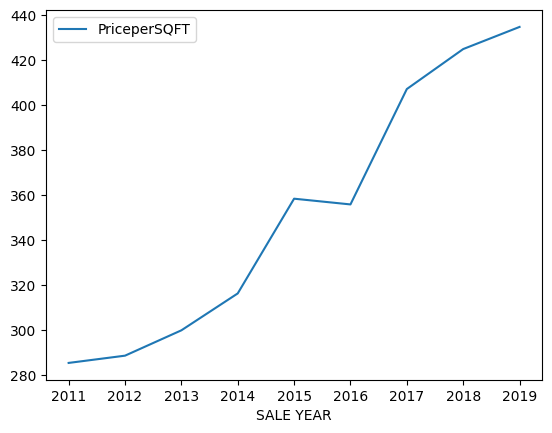

In [ ]:
SalesYear.plot(y = 'PriceperSQFT', use_index = True) #plot the trend

In [ ]:
#perform descriptive analysis for the recent sales
SingleSalesRecent = SingeSales[SingeSales['SALE YEAR']>=2017]

In [ ]:
SingleSalesRecent.reset_index(inplace = True,drop = True) #reset the index
SingleSalesRecent.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,PRICE_SQFT,SALE YEAR
count,37769.000000,37769.000000,37769.000000,37769.000000,37769.000000,37769.000000,3.776900e+04,37769,37769.000000,37769.000000
mean,3.941486,6559.033202,74.625937,10984.051471,1532.856761,1945.154836,6.467880e+05,2018-06-25 18:29:42.604781824,432.380384,2017.967328
min,1.000000,15.000000,1.000000,10001.000000,300.000000,1850.000000,2.000000e+04,2017-01-03 00:00:00,45.787546,2017.000000
25%,3.000000,3736.000000,21.000000,10314.000000,1160.000000,1925.000000,4.250000e+05,2017-09-26 00:00:00,302.734375,2017.000000
50%,4.000000,5966.000000,42.000000,11234.000000,1378.000000,1940.000000,5.550000e+05,2018-06-21 00:00:00,401.234568,2018.000000
75%,5.000000,9006.000000,71.000000,11412.000000,1728.000000,1960.000000,7.650000e+05,2019-03-28 00:00:00,532.094595,2019.000000
max,5.000000,16323.000000,4328.000000,11694.000000,12720.000000,2019.000000,1.160500e+07,2019-12-31 00:00:00,1313.271605,2019.000000
std,0.891823,3826.558050,155.741961,496.801575,653.779972,27.859913,4.268685e+05,NaN,187.508974,0.813524


In [ ]:
#group sales by zip code
SalesZipcode = SingleSalesRecent.groupby(['ZIP CODE']).agg({'ADDRESS':'count','SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
SalesZipcode['PriceperSQFT'] = SalesZipcode['SALE PRICE'] / SalesZipcode['GROSS SQUARE FEET'] #comoute price per sq ft

In [ ]:
SalesZipcode.head()

,ADDRESS,SALE PRICE,GROSS SQUARE FEET,PriceperSQFT
ZIP CODE,,,,
10001.0,1,5500000,4290.0,1282.051282
10009.0,3,16700000,18880.0,884.533898
10011.0,1,2421900,3935.0,615.476493
10013.0,2,10107000,8700.0,1161.724138
10014.0,2,7800000,10203.0,764.481035


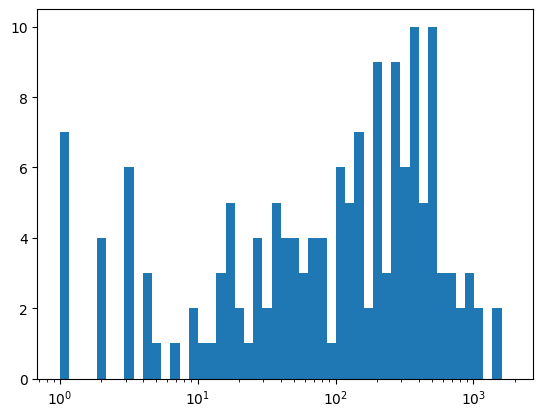

In [ ]:
#records per zip code
plot_loghist(SalesZipcode['ADDRESS'],bins=50);

In [ ]:
#data looks a bit noisy; so how reliable is it? how many zip codes have move then 20 records
sum(SalesZipcode['ADDRESS']>=20)

121

In [ ]:
SalesZipcode=SalesZipcode.loc[SalesZipcode['ADDRESS']>=20] #keep only the "reliable" zip codes with over 20 records

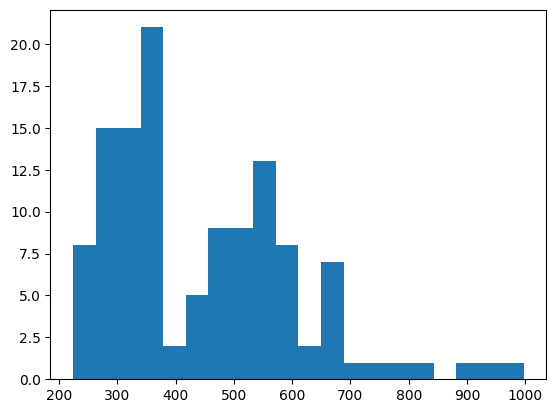

In [ ]:
#distribution of price per sq.foot
plt.hist(SalesZipcode['PriceperSQFT'],bins=20);

In [ ]:
zipcode.head(2)

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1..."


In [ ]:
#merge price data with the zip code shapes into a new geopandas dataframe
SalesGeo = zipcode.merge(SalesZipcode,left_on='ZIPCODE',right_on='ZIP CODE',how='left')

In [ ]:
SalesGeo

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ADDRESS,SALE PRICE,GROSS SQUARE FEET,PriceperSQFT
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.38, 1038141.936 1...",536.0,218957824.0,600660.0,364.528725
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.44, 1002314.243 1...",76.0,73047195.0,155133.0,470.868191
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",159.0,66188824.0,202602.0,326.693833
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",116.0,157707118.0,242723.0,649.741137
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",141.0,190997928.0,270926.0,704.981906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.51 172...",502.0,240312214.0,729592.0,329.378905
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.41, 1027813.01 16...",132.0,46529726.0,161579.0,287.968894
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",NaN,NaN,NaN,NaN
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",NaN,NaN,NaN,NaN


<Axes: >

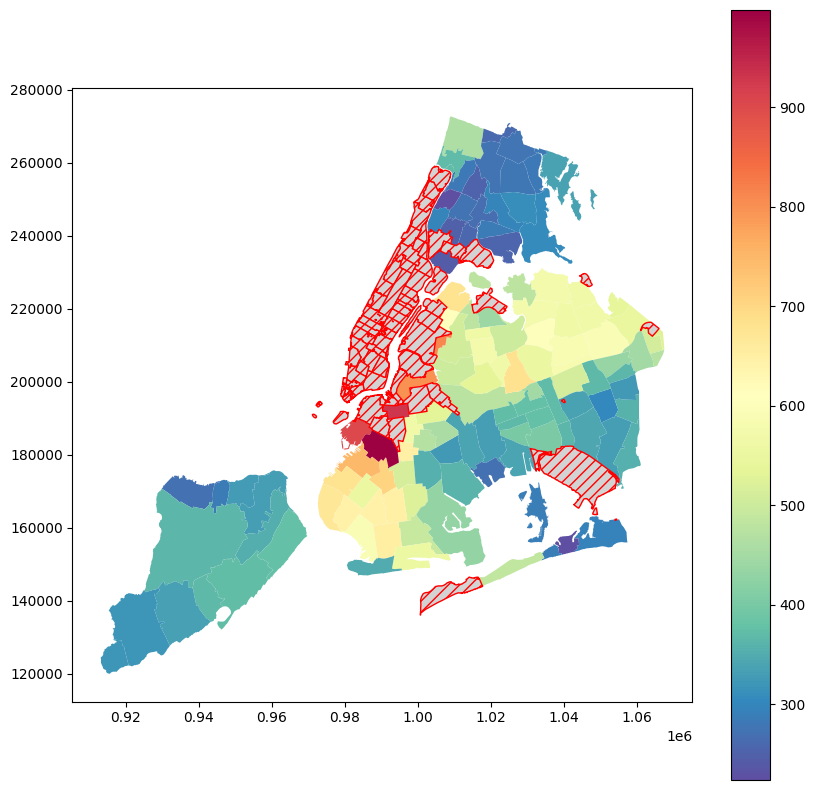

In [ ]:
#plot the spatial distribution of sale price normalized by gross square feet
SalesGeo.plot(column='PriceperSQFT',cmap='Spectral_r',legend=True,markersize=0.01,figsize=(10,10),missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values",
                }) # removed colormap from this line and added cmap to SalesGeo.plot()

Text(0.5, 1.0, 'Distribution of Housing Price per SQFT in NYC, CRS: EPSG 2263')

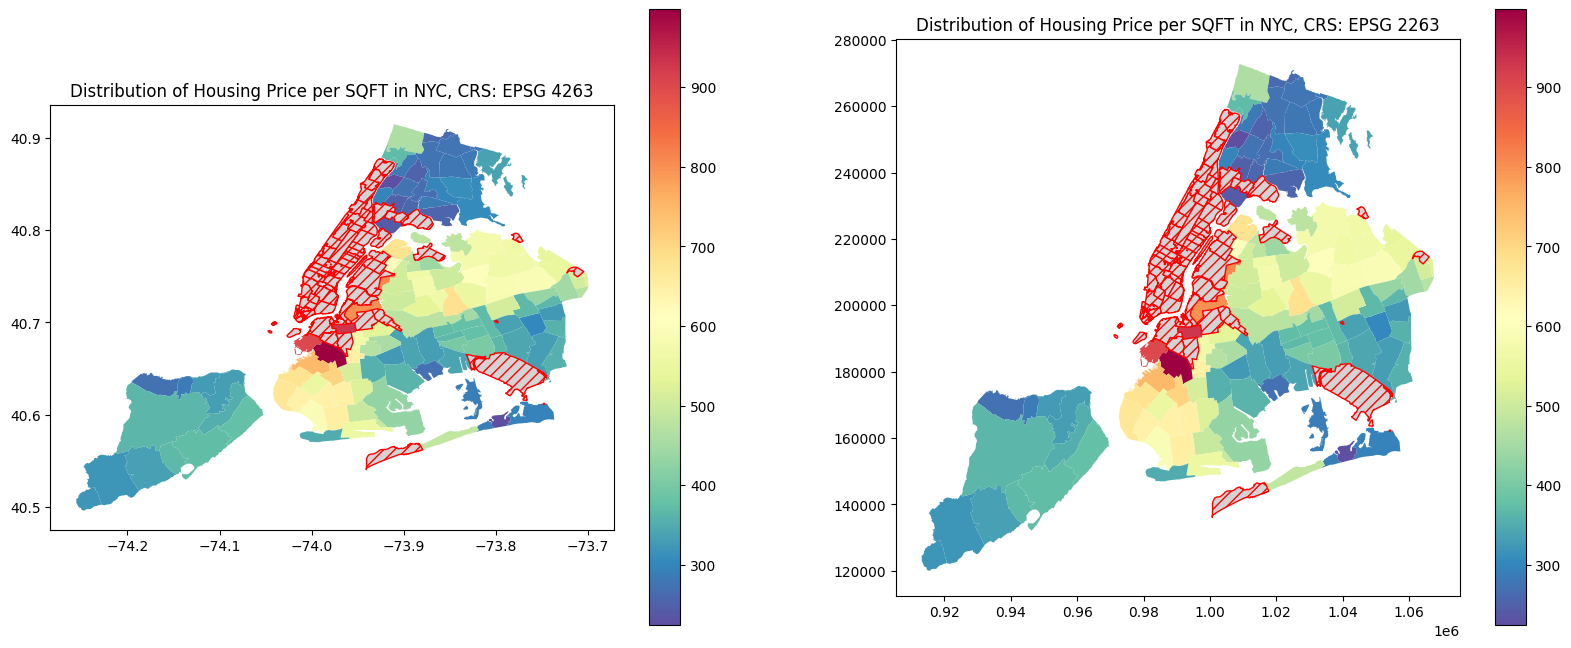

In [ ]:
'''plot the spatial distribution of sale price normalized by gross square feet'''
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
SalesGeo.to_crs({'init': 'epsg:4326'}).plot(ax=ax[0],column='PriceperSQFT',
                                            cmap='Spectral_r',legend=True, # changed colormap to cmap
                                            missing_kwds={
                                                            "color": "lightgrey",
                                                            "edgecolor": "red",
                                                            "hatch": "///",
                                                            "label": "Missing values",
                                                            },)
ax[0].set_aspect('equal')
ax[0].set_title('Distribution of Housing Price per SQFT in NYC, CRS: EPSG 4263',fontsize=12)
SalesGeo.to_crs({'init': 'epsg:2263'}).plot(ax=ax[1],column='PriceperSQFT',
                                            cmap='Spectral_r',legend=True, # changed colormap to cmap
                                            missing_kwds={
                                                            "color": "lightgrey",
                                                            "edgecolor": "red",
                                                            "hatch": "///",
                                                            "label": "Missing values",
                                                            },)
ax[1].set_title('Distribution of Housing Price per SQFT in NYC, CRS: EPSG 2263',fontsize=12)

##Task 1.

Repeat the temporal analysis for the two-family houses, visualizing the temporal trend of price per sq. foot per year.

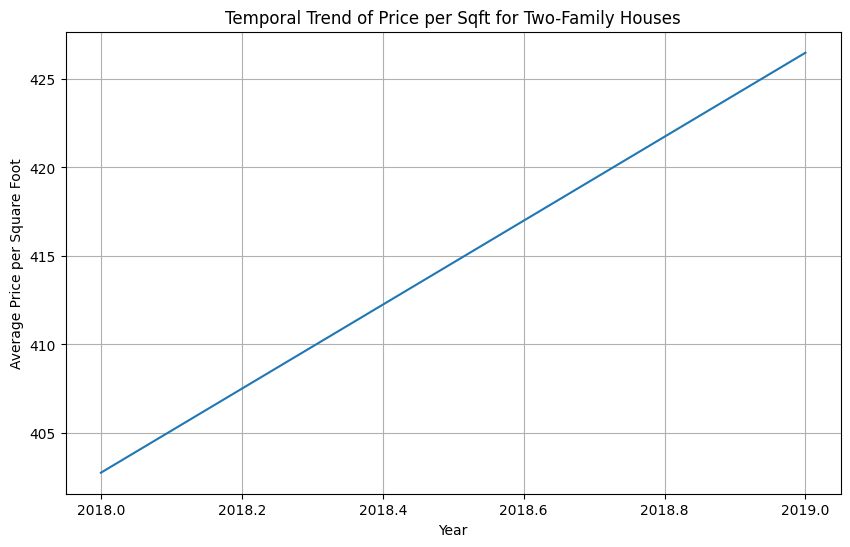

In [ ]:

# Assuming 'Sales' is your DataFrame containing the sales data
# Replace 'SALE DATE' and 'GROSS SQUARE FEET' with the actual column names from your DataFrame
Sales['SALE DATE'] = pd.to_datetime(Sales['SALE DATE'])
Sales['Year'] = Sales['SALE DATE'].dt.year
Sales = Sales[Sales['GROSS SQUARE FEET'] > 0]
Sales['PriceperSQFT'] = Sales['SALE PRICE'] / Sales['GROSS SQUARE FEET']

# Filter for two-family houses (replace 'BUILDING CLASS CATEGORY' with the actual column name)
TwoFamily = Sales[Sales['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS']

# Group data by year and calculate the average price per square foot
PriceSQFT = TwoFamily.groupby('Year')['PriceperSQFT'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(PriceSQFT.index, PriceSQFT.values)
plt.xlabel('Year')
plt.ylabel('Average Price per Square Foot')
plt.title('Temporal Trend of Price per Sqft for Two-Family Houses')
plt.grid(True)
plt.show()

##Task 2.

Compute average price per square foot of the one, two and three family houses per borough. Visualize as three bar plots (one per each type of houses). Don't forget to name the boroughs on x axis

           One          Two        Three
3   569.767143   486.425743   453.240788
2   323.258689   263.757452   227.299307
1  2020.181728  1317.897349  1098.758499
4   470.572177   422.680229   395.948576
5   371.468685   324.035607   265.216105


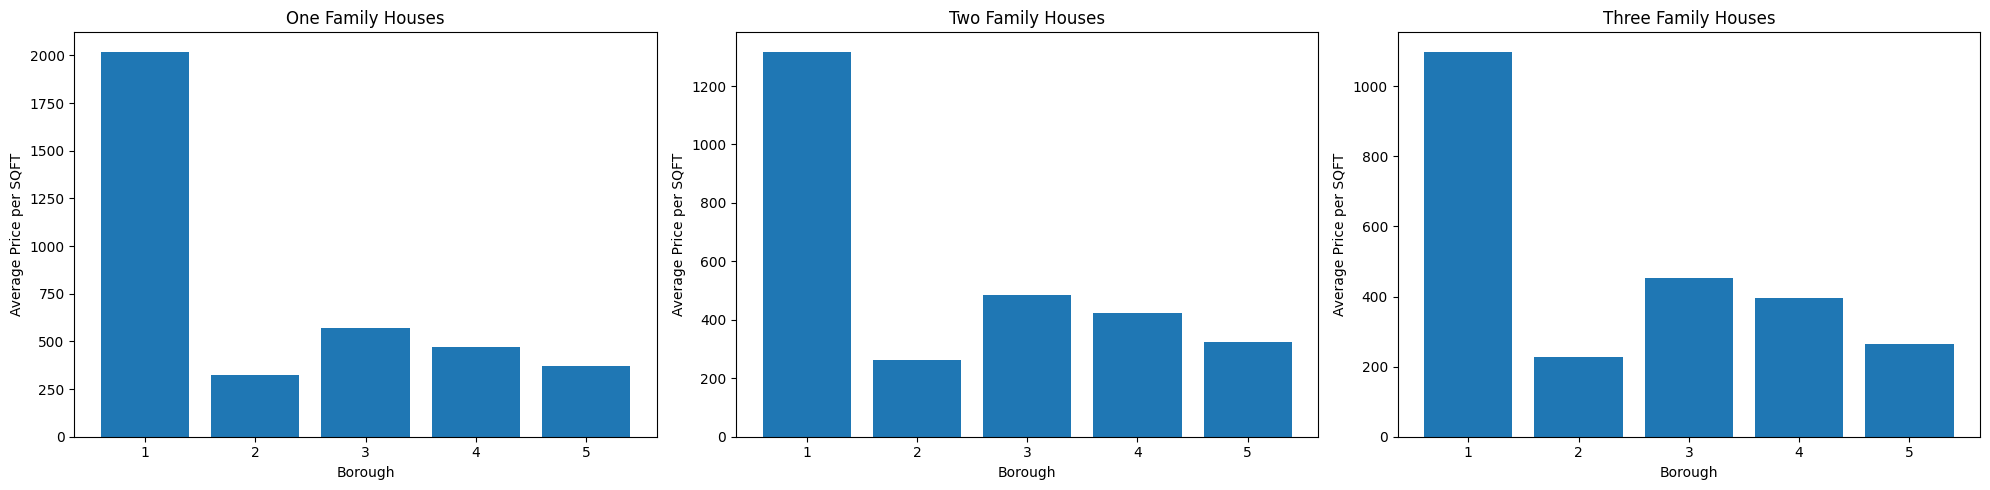

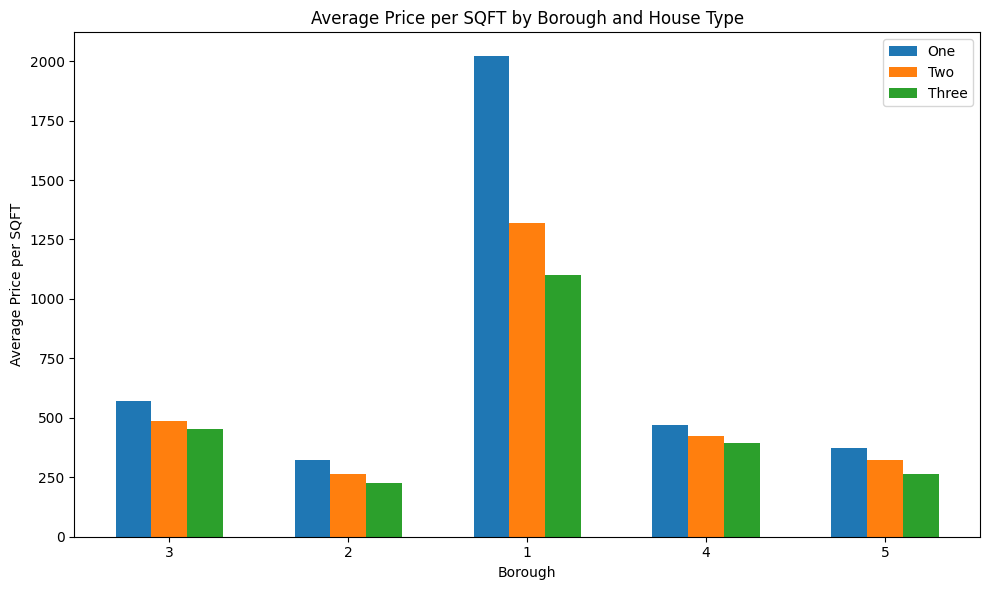

In [ ]:

# Replace 'GROSS SQUARE FEET', 'BOROUGH', and 'BUILDING CLASS CATEGORY' with actual column names
Sales = Sales[Sales['GROSS SQUARE FEET'] > 0]
Sales['PriceperSQFT'] = Sales['SALE PRICE'] / Sales['GROSS SQUARE FEET']

# Define the building categories for one, two, and three family houses
building_categories = {
    'One': ['01 ONE FAMILY DWELLINGS'],
    'Two': ['02 TWO FAMILY DWELLINGS'],
    'Three': ['03 THREE FAMILY DWELLINGS']
}

# Calculate average price per sqft for each borough and building category
borough_prices = {}
for borough in Sales['BOROUGH'].unique():
    borough_prices[borough] = {}
    for house_type, categories in building_categories.items():
        borough_data = Sales[
            (Sales['BOROUGH'] == borough) & (Sales['BUILDING CLASS CATEGORY'].isin(categories))
        ]
        borough_prices[borough][house_type] = borough_data['PriceperSQFT'].mean()

# Create a table
table_data = pd.DataFrame(borough_prices).transpose()

# Display the table
print(table_data)

# Create bar plots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, house_type in enumerate(building_categories.keys()):
    ax = axes[i]
    ax.bar(borough_prices.keys(), [borough_prices[borough][house_type] for borough in borough_prices])
    ax.set_xlabel('Borough')
    ax.set_ylabel('Average Price per SQFT')
    ax.set_title(f'{house_type} Family Houses')

plt.tight_layout()
plt.show()


# EXTRACREDIT

# Transpose the table for plotting
plot_data = table_data.transpose()

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Width of each bar

# Calculate x positions for each bar group
x = range(len(plot_data.columns))

for i, house_type in enumerate(plot_data.index):
    ax.bar([pos + i * width for pos in x], plot_data.loc[house_type], width, label=house_type)

# Set plot labels and title
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(plot_data.columns)
ax.set_xlabel('Borough')
ax.set_ylabel('Average Price per SQFT')
ax.set_title('Average Price per SQFT by Borough and House Type')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
SalesZipcode = SingleSalesRecent.groupby(['ZIP CODE']).agg({'ADDRESS':'count','SALE PRICE':'sum','GROSS SQUARE FEET':'sum'})
SalesZipcode['PriceperSQFT'] = SalesZipcode['SALE PRICE'] / SalesZipcode['GROSS SQUARE FEET'] #comoute price per sq ft


##Task 3

Visualize the average size (sq.foot) of the a single family house per zip code area. Exclude zip code areas having less than 20 houses sold


In [ ]:
SalesZipcode.head()

,ADDRESS,SALE PRICE,GROSS SQUARE FEET,PriceperSQFT
ZIP CODE,,,,
10001.0,1,5500000,4290.0,1282.051282
10009.0,3,16700000,18880.0,884.533898
10011.0,1,2421900,3935.0,615.476493
10013.0,2,10107000,8700.0,1161.724138
10014.0,2,7800000,10203.0,764.481035


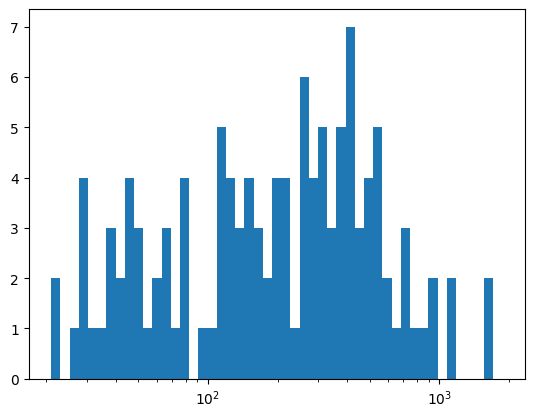

In [ ]:
#records per zip code
plot_loghist(SalesZipcode['ADDRESS'],bins=50);

In [ ]:
#data looks a bit noisy; so how reliable is it? how many zip codes have move then 20 records
sum(SalesZipcode['ADDRESS']>=20)

121

In [ ]:
SalesZipcode=SalesZipcode.loc[SalesZipcode['ADDRESS']>=20] #keep only the "reliable" zip codes with over 20 records

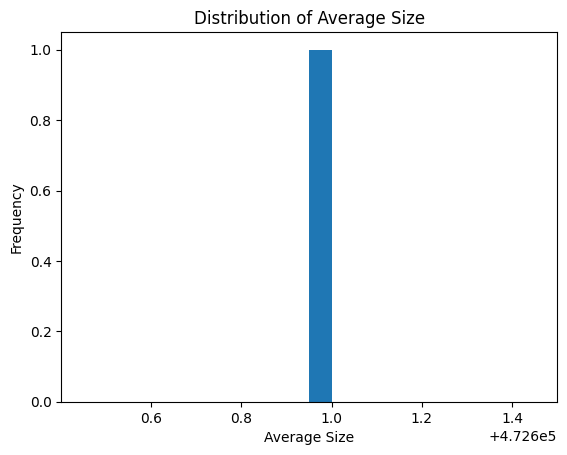

In [ ]:
import matplotlib.pyplot as plt

# Calculate average size
avg_size = SalesZipcode['GROSS SQUARE FEET'].mean()

# Plot distribution of average size
plt.hist(avg_size, bins=20)
plt.xlabel('Average Size')
plt.ylabel('Frequency')
plt.title('Distribution of Average Size')
plt.show()

In [ ]:
print(SalesZipcode.columns)

Index(['ADDRESS', 'SALE PRICE', 'GROSS SQUARE FEET', 'PriceperSQFT'], dtype='object')


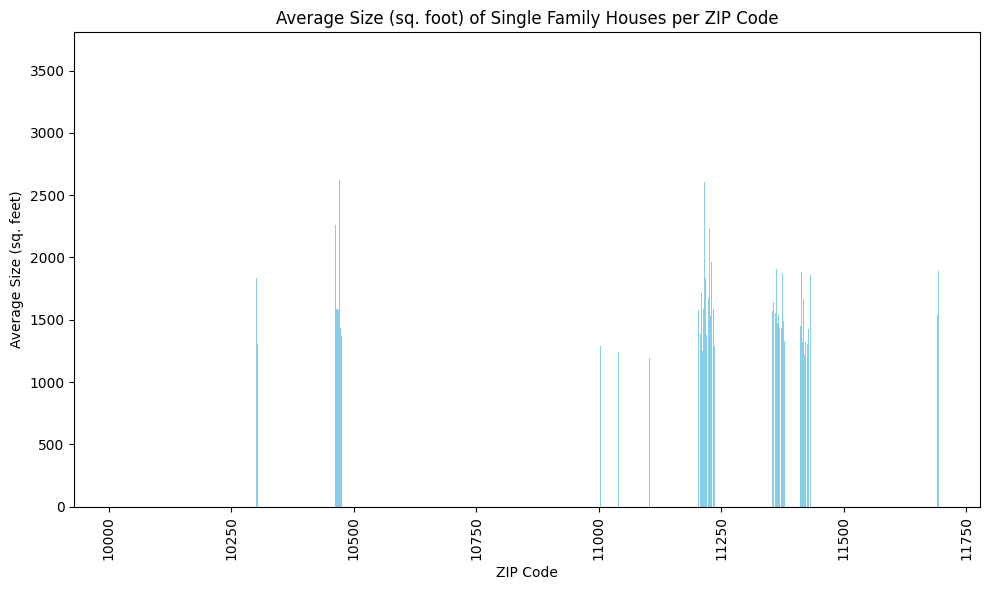

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter for single-family houses (replace 'BUILDING CLASS CATEGORY' with the actual column name)
single_family_houses = Sales[Sales['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']

# Step 2: Group by ZIP Code and calculate the count and mean of 'GROSS SQUARE FEET'
zip_code_stats = single_family_houses.groupby('ZIP CODE').agg(
    house_count=('ADDRESS', 'size'),
    avg_size=('GROSS SQUARE FEET', 'mean')
).reset_index()

# Step 3: Exclude ZIP codes with fewer than 20 houses sold
filtered_zip_code_stats = zip_code_stats[zip_code_stats['house_count'] >= 20]

# Step 4: Plot the average size of single-family houses per ZIP code
plt.figure(figsize=(10, 6))
plt.bar(filtered_zip_code_stats['ZIP CODE'], filtered_zip_code_stats['avg_size'], color='skyblue')
plt.xlabel('ZIP Code')
plt.ylabel('Average Size (sq. feet)')
plt.title('Average Size (sq. foot) of Single Family Houses per ZIP Code')
plt.xticks(rotation=90)  # Rotate ZIP code labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import os
import zipfile
import geopandas as gpd
import urllib.request

# Step 1: Download the ZIP code map from the provided URL
url = 'https://github.com/CUSP2020PUI/Data/raw/master/ZIPCODE.zip'
zip_path = 'Data/ZIPCODE.zip'
extract_path = 'Data/ZIPCODE/'

# Create directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Download the ZIP file
urllib.request.urlretrieve(url, zip_path)

# Step 2: Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 3: List files in the extracted folder to verify the shapefile name
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

# Step 4: Load the correct shapefile
shapefile_path = os.path.join(extract_path, 'ZIP_CODE_040114.shp')

# Step 5: Load the shapefile into a GeoDataFrame
zipcode_gdf = gpd.read_file(shapefile_path)

Extracted files: ['ZIP_CODE_040114.dbf', 'ZIP_CODE_040114.sbn', 'ZIP_CODE_040114.shx', 'ZIP_CODE_040114.shp', 'ZIP_CODE_040114.sbx', 'ZIP_CODE_040114.prj', 'ZIP_CODE_040114.shp.xml']


GeoDataFrame ZIP codes (sample): 0    11436
1    11213
2    11212
3    11225
4    11218
Name: ZIPCODE, dtype: object
Filtered Data ZIP codes (sample): 7     10014
28    10301
29    10302
30    10303
31    10304
Name: ZIP CODE, dtype: object
Merged GeoDataFrame shape:  (127, 16)


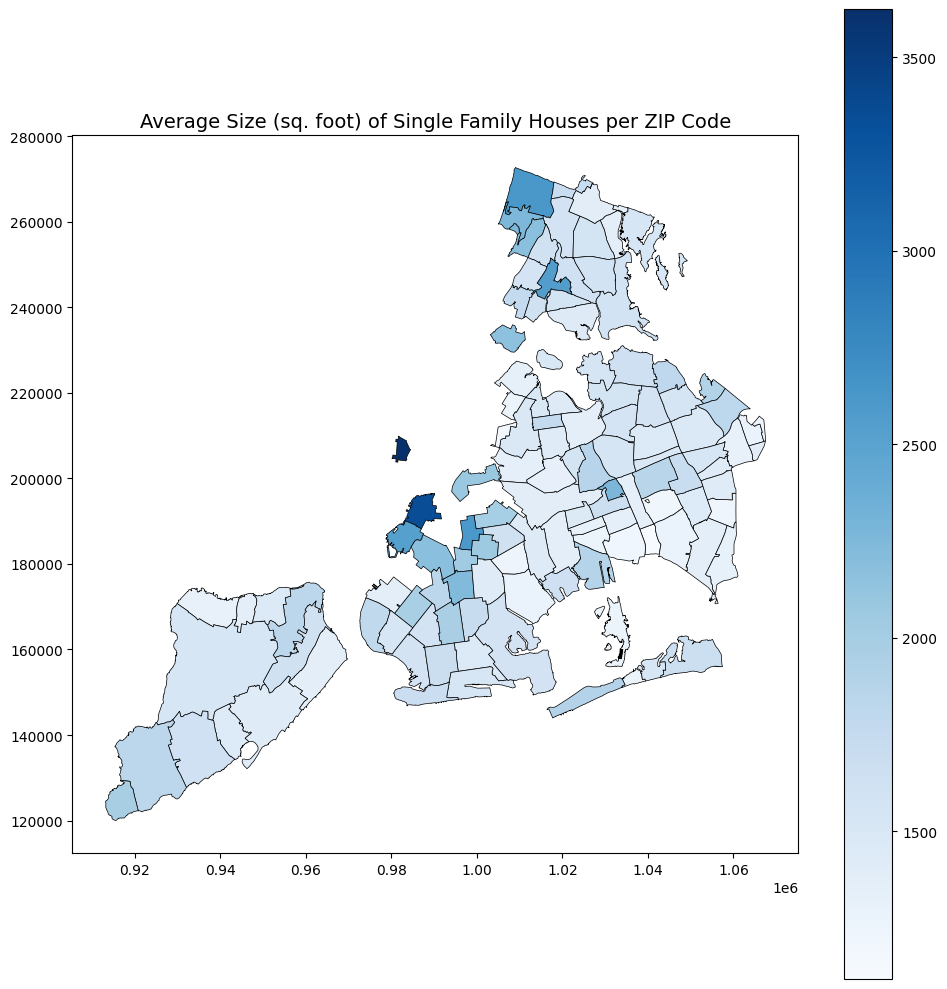

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Filter for single-family houses (replace 'BUILDING CLASS CATEGORY' with actual column name)
single_family_houses = Sales[Sales['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']

# Step 2: Group by ZIP Code and calculate the count and mean of 'GROSS SQUARE FEET'
zip_code_stats = single_family_houses.groupby('ZIP CODE').agg(
    house_count=('ADDRESS', 'size'),
    avg_size=('GROSS SQUARE FEET', 'mean')
).reset_index()

# Step 3: Exclude ZIP codes with fewer than 20 houses sold
filtered_zip_code_stats = zip_code_stats[zip_code_stats['house_count'] >= 20]

# Step 4: Load the ZIP code shapefile
shapefile_path = os.path.join(extract_path, 'ZIP_CODE_040114.shp')
zipcode_gdf = gpd.read_file(shapefile_path)

# Step 5: Ensure ZIP codes in both datasets are 5 characters long and handle the float issue
# Convert the 'ZIP CODE' column to string, and remove the decimal point
filtered_zip_code_stats['ZIP CODE'] = filtered_zip_code_stats['ZIP CODE'].astype(int).astype(str).str.zfill(5)
zipcode_gdf['ZIPCODE'] = zipcode_gdf['ZIPCODE'].astype(str).str.zfill(5)

# Debugging: Check ZIP code formatting after converting and padding
print("GeoDataFrame ZIP codes (sample):", zipcode_gdf['ZIPCODE'].head())
print("Filtered Data ZIP codes (sample):", filtered_zip_code_stats['ZIP CODE'].head())

# Step 6: Merge the average size data with the ZIP code GeoDataFrame
zipcode_gdf = zipcode_gdf.merge(filtered_zip_code_stats, left_on='ZIPCODE', right_on='ZIP CODE')

# Debugging: Check if the merge was successful
print("Merged GeoDataFrame shape: ", zipcode_gdf.shape)

# Step 7: Plot the spatial distribution of average house sizes
fig, ax = plt.subplots(figsize=(10, 10))

# Check if there is valid geometry data to plot
if zipcode_gdf.empty:
    print("Error: Merged GeoDataFrame is empty. No data to plot.")
else:
    zipcode_gdf.plot(
        column='avg_size',  # Column to visualize (average size in square feet)
        cmap='Blues',       # Colormap for the visualization
        legend=True,        # Add a legend
        ax=ax,              # Axes on which to plot the data
        edgecolor='black',  # Add borders to distinguish ZIP codes
        linewidth=0.5       # Set the line width for the borders
    )

    # Step 8: Customize the plot
    ax.set_title('Average Size (sq. foot) of Single Family Houses per ZIP Code', fontsize=14)
    ax.set_aspect('equal')  # Ensure the map has an equal aspect ratio
    plt.tight_layout()

    # Show the map
    plt.show()

In [ ]:
# Find the row with the highest average size from the filtered_zip_code_stats DataFrame
max_avg_size = filtered_zip_code_stats.loc[filtered_zip_code_stats['avg_size'].idxmax()]

# Print the ZIP code and the corresponding highest average size
print(f"The ZIP code with the highest average size of single-family houses is {max_avg_size['ZIP CODE']}, with an average size of {max_avg_size['avg_size']} square feet.")


The ZIP code with the highest average size of single-family houses is 10014, with an average size of 3625.0 square feet.


In [ ]:
# Print all ZIP codes and their corresponding average sizes
print(filtered_zip_code_stats[['ZIP CODE', 'avg_size']])


    ZIP CODE     avg_size
7      10014  3625.000000
28     10301  1831.617450
29     10302  1376.379928
30     10303  1306.452316
31     10304  1625.751825
..       ...          ...
156    11436  1118.724518
157    11691  1674.682028
158    11692  1536.652174
159    11693  1269.382022
160    11694  1890.980392

[119 rows x 2 columns]
